<span style="color:black;font-weight:700;font-size:32px"> 
               HR аналитика компании 'Работа с заботой'
</span>

<span style="color:black;font-weight:700;font-size:22px"> 
              Описание проекта
</span>

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 

У вас будет несколько задач. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.

Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.
Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.


**Задача 1:** предсказание уровня удовлетворённости сотрудника


**Задача 2:** предсказание увольнения сотрудника из компании
Для этой задачи вы можете использовать те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: это quit — увольнение сотрудника из компании.


Входные признаки:

- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

<span style="color:black;font-weight:700;font-size:22px"> 
              План работы
 </span>
 
**Задача 1** 

**Целевой признак** - Уровень удовлетворенности
 
1) Загрузка данных

2) Предобработка данных

3) Исследовательский анализ данных

4) Подготовка данных

5) Обучение моделей

6) Вывод

**Задача 2**

**Целевой признак** - увольнений сотрудника из компании

 
1) Загрузка данных

2) Предобработка данных

3) Исследовательский анализ данных

4) Добавление нового входного признака

5) Подготовка данных

6) Обучение модели

7) Выводы

In [81]:
import time
start_time = time.time()
start_time

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, StandardScaler, 
                                   MinMaxScaler, MaxAbsScaler, OrdinalEncoder,
                                  RobustScaler)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             roc_auc_score, r2_score, roc_curve,RocCurveDisplay, make_scorer,
                            mean_absolute_error, mean_squared_error, r2_score)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier




<span style="color:black;font-weight:700;font-size:22px"> 
               Задача 1: предсказание уровня удовлетворённости сотрудника
</span>

# Загрузка данных

In [83]:
try:
    train_job_satisfaction_df = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', index_col='id')
    test_features_df = pd.read_csv('/datasets/test_features.csv', index_col='id')
    test_target_job_satisfaction_df = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', index_col='id')
    
    
except:
    train_job_satisfaction_df = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv', index_col='id')
    test_features_df = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv', index_col='id')
    test_target_job_satisfaction_df = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv',index_col='id')
    


In [84]:
train_job_satisfaction_df.head()

In [85]:
train_job_satisfaction_df.info()

In [86]:
test_features_df.head()

In [87]:
test_features_df.info()

In [88]:
test_target_job_satisfaction_df.head()

In [89]:
test_target_job_satisfaction_df.info()

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

Датасет train_job_satisfaction_df содержит 4000 записей и 9 переменных. Столбцы dept и level имеют пропуски, которые необходимо обработать. **Данная выборка является тренировочной**.(X_train)

Датасет test_features_df содержит 2000 записей и 8 признаков. Столбцы dept и level имеют пропуски, которые необходимо обработать. **Данная выборка содержит в себе входные признаки тестовой выборки**.(X_test)

Датасет test_target_job_satisfaction_df содержит 2000 записей . Датасет **признак целевой переменной тестовой выборки**(y_true)

# Предобработка данных

In [90]:
numeric_cols = train_job_satisfaction_df.select_dtypes(exclude='object').columns

for col in numeric_cols:
    sns.displot(train_job_satisfaction_df[col], kde=True, bins=60)
    plt.title(f"Гистограмма для {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

Данные не содержат явных выбросов


In [91]:
object_columns = train_job_satisfaction_df.select_dtypes(include='object').columns

for col in object_columns:
    print(train_job_satisfaction_df[col].value_counts())
    print()

В данных отстутсвуют неявные дубликаты текстовых столбцах

In [92]:
train_job_satisfaction_df.index.duplicated().sum()


Дубликаты в по id сотрудников также отстутсвуют

In [93]:
train_job_satisfaction_df.isna().mean()

В двух столбцах присутствуют пропуски, соответсвенно обработаем их в пайплайне обработки категириальных столбцов на этапе подготовки данных

## Обработка test_features_df

In [94]:
test_features_df.isna().mean()

Пропуски будут также обработаны с использованием пайпланов предобработки данных


In [95]:
test_features_df.index.duplicated().sum()

In [96]:
object_columns = test_features_df.select_dtypes(include='object').columns

for col in object_columns:
    print(test_features_df[col].value_counts())
    print()

## Обработка test_target_job_satisfaction_df

In [97]:
test_target_job_satisfaction_df.head()

In [98]:
test_features_df.head()

Как можно заметить в тестовых выборках не совпдают индексы, поэтому проверим совпадают ли уникальные индексы в двух датасетах и расположим их в одинаковом порядке для получения точных прогнозов.

In [99]:
differing_indices = test_features_df.index.symmetric_difference(test_target_job_satisfaction_df.index)

if differing_indices.empty:
    print("Все индексы совпадают.")
else:
    print(f"Различающиеся индексы: {differing_indices}")

Так все индексы в датасетах совпадают, расположим индексы в одинкавом порядке для двух датасетов

In [100]:
test_features_df = test_features_df.reindex(test_target_job_satisfaction_df.index)

In [101]:
test_features_df.head(10)

In [102]:
test_target_job_satisfaction_df.head(10)

Значения в категириальных признаках в тренировочной и тестовой выборках совпадают и не нуждаются в доп. предобработке.

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

На этапе предобработки данных датасеты были изучены на предмет наличия пропусков, дубликатов (явных, неявных) и аномалий. Пропуски в данных будут обработаны на этапе в пайплайна на этапе подготовки данных.

# Исследовательский анализ

Проведем исследовательский анализ тренировочного датасета

In [103]:
numeric_columns = train_job_satisfaction_df.select_dtypes(include=['number'])
columns = numeric_columns.columns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    numeric_columns.boxplot(column=column, ax=ax)
    ax.set_title(f'Ящик с усами для {column}')
    ax.set_ylabel('Значения')
    ax.grid(False)

for i in range(len(columns), 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


Как можно заметить числовый столбцы распределены в разных диапазонах данных, поэтому при построении моделей воспользуемся масштабированием числовых признаков, так мы сможем объективнее оценивать значимость признаков.

In [104]:
for col in object_columns:
    train_job_satisfaction_df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

    for i, value in enumerate(train_job_satisfaction_df[col].value_counts()):
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

    plt.xlabel('Категория', fontsize=14)
    plt.ylabel('Среднее значение', fontsize=14)
    plt.title(f'Распределение {col}', fontsize=16)
    plt.gcf().set_size_inches(10, 6)
    plt.show()

Средняя зарплата сотрудников - 33926 у.е.\
Средняя оценка руководителя - 3.4.\
Средний уровень удовлетворенности сотрудника в компании - 0.55 [0,1]

Самые популярный отделы в компании - dept и technology, в отделе hr работает меньше всего людей.\
В компании больше всего сотрудников уровня junior и middle, сотрудников уровня sinior меньшк всего.\
В среднем больше всего сотрудников в компании имеют средний уровень нагрузки, меньше всего высокий.\
Только 120 человек получили повышения за последний год, остальные проработали без повышения по должности.\ 
559 человек в компании нарушили трудовой договор за последний год.

Категориальные столбцы обработаем следующими образом: Признаки 'dept' 'last_year_promo, last_year_violations обработаем OneHotEncoder, признаки 'level' в порядке [junior, middle, sinior], признак 'workload' в порядке [low, medium, high] обработаем с помощью OrdinalEncdoder в приведенном порядке.

In [105]:
train_job_satisfaction_df.head()

Исследуем целевой признак job_satisfaction_rate.


In [106]:
col_to_plot_scatter = ['employment_years','supervisor_evaluation','salary']
fig, axes = plt.subplots(len(col_to_plot_scatter), 1, figsize=(8, 25))
sns.set_palette("deep")

for i, col in enumerate(col_to_plot_scatter):
    sns.set_palette("pastel")
    sns.regplot(x='job_satisfaction_rate', y=col, data=train_job_satisfaction_df , ax=axes[i],  
                line_kws={"color": 'red'}, scatter_kws={"color": 'skyblue'})
    axes[i].set_xlabel('job_satisfaction_rate')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Диаграмма рассеяния для {col} и job_satisfaction_rate')

plt.tight_layout()
plt.show()

Как можно заметить из графиков скаттерплота положительную корреляцию с признакми employment_years  и supervisor_evaluation	и менее слабую корреляцию с salary. 

Построим матрицу корреляций, проверим наличие мултиколлинеарности в признаках


In [107]:
continuos_cols = ['salary', 'job_satisfaction_rate']

def plot_phik_correlation_matrix(dataset):
    phik_correlation = phik_matrix(dataset, interval_cols=continuos_cols)

    plot_correlation_matrix(phik_correlation.values,
                       x_labels=phik_correlation.columns,
                       y_labels=phik_correlation.index,
                       vmin=0, vmax=1, 
                       color_map='Greens', 
                       title=r'correlation $\phi_K$',
                       fontsize_factor=1.5,
                       figsize=(12,6))

plot_phik_correlation_matrix(train_job_satisfaction_df)

Из матрицы корреляций можно отметить, что мультиколлинеарные столбцы отсутсвуют, но при этом можно заметить, что наблюдается  коррелляция между целевым признаком и следующими признаками: supervisor_evaluation, last_year_violations.

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

На этапе исследовательского анализа были изучены числовые и категориальные признаки, числовые будут обработаны с помощью масштабирования, категориальные с помощью кодировщиков (OrdinalEncoder, OneHotEncoder).

Также корреляционный анализ показал отстутвие мультиколлинеарности между признаками в данных, а также отсутствие утечке целевого признака.

# Подготовка данных

На данном этапе реализуем пайплайн обработки датасетов, который будет включать в себя обработку пропусков , масштабирование числовых признаков и кодировку категориальных столбцов.

In [108]:
train_job_satisfaction_df.head()

In [109]:
X_train = train_job_satisfaction_df.drop(columns=['job_satisfaction_rate'], axis=1)
y_train = train_job_satisfaction_df['job_satisfaction_rate']

X_test = test_features_df
y_test = test_target_job_satisfaction_df

In [110]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']


ohe_pipeline = Pipeline(steps=[
                                ('nan_imputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                ('ohe_encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])


ord_pipepline = Pipeline(steps=[
                                ('nan_imputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                ('ord_encoder', OrdinalEncoder(
                                                    categories=[
                                                        ['junior', 'middle', 'sinior'],
                                                        ['low', 'medium', 'high']
                                                    ], 
                                                    handle_unknown='use_encoded_value', unknown_value=np.nan)),
                                ('nan_imputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])


data_preprocessor = ColumnTransformer([
                                        ('ohe', ohe_pipeline, ohe_columns),
                                        ('ord', ord_pipepline, ord_columns),
                                        ('num', MinMaxScaler(), num_columns)],
                                        remainder='passthrough')

    

In [111]:
data_preprocessor

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span> 

На этапе подготовки данных реализован пайплайн обработки данных, который содержит в себе обработку числовых и категориальных признаков, а также обработку пропусков в столбцах.

# Обучение моделей

Перед обучением моделей реализуем функцию, рассчитывающую метрику smape


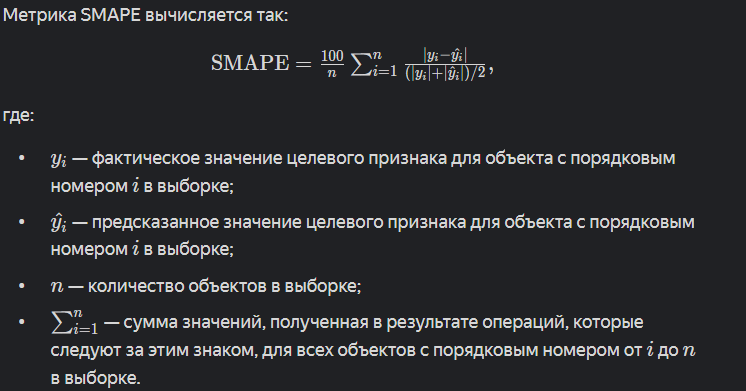

In [112]:
def smape(y_true, y_pred):
    """
    Рассчитывает метрику SMAPE (Symmetric Mean Absolute Percentage Error).

    Параметры:
    - y_true: фактические значения
    - y_pred: предсказанные значения

    Возвращает:
    - Значение SMAPE
    """

    # Преобразование в numpy массивы, если входные данные - это объекты Series
    if isinstance(y_true, pd.Series):
        y_true = y_true.values
    if isinstance(y_pred, pd.Series):
        y_pred = y_pred.values

    # Расчет SMAPE
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0  # Значение 0/0 заменяется на 0
    smape_value = 100 * np.mean(diff)

    return smape_value

In [113]:
smape_score = make_scorer(smape, greater_is_better=False)

Теперь обучим модели. В качестве модели используем линейные модели - Линейная регрессия(LinearRegression), а также метод опорных векторов(SVR), а также модель типа дерева решений - DecisionTreeRegressor

In [ ]:
RANDOM_STATE = 42

modelling_pipeline = Pipeline(steps=[('data_preprocessing', data_preprocessor),
                                     ('models', LinearRegression())])

param_grid = [
    
    {'models': [LinearRegression()]
     },
    
    {'models': [SVR()],
     'models__kernel': ['rbf', 'poly', 'sigmoid'],
     'models__C': [0.001, 0.01, 0.1, 1],
     },
    
    {'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
    'models__max_depth': range(5,15),
    'models__min_samples_leaf': range(5,15),
    'models__min_samples_split': range(5,15),
    'models__criterion': ['squared_error', 'absolute_error']
    },
    
    {'models': [SGDRegressor(loss='squared_loss', penalty='l2')]}
                           
]



grid_search = RandomizedSearchCV(
                              modelling_pipeline,
                              param_grid,
                              cv=5,
                              scoring=smape_score,
                              n_jobs=-1
                              )

grid_search.fit(X_train,y_train)


In [ ]:
grid_search.best_estimator_

In [ ]:
print(f'Метрика SMAPE на тренировочной выборке: {abs(grid_search.best_score_)}')


In [ ]:
y_predict = grid_search.best_estimator_.predict(test_features_df)
y_predict

In [ ]:
print(f'Метрика SMAPE на тестовой выборке: {smape(y_true=np.array(y_test).ravel(), y_pred=y_predict)}')
print(f'Метрика R2: {r2_score(y_true=np.array(y_test), y_pred=y_predict)}')

**Интерпретация SMAPE:  SMAPE = 13.5, это означает, что в среднем прогнозы отклоняются на 13.57% от фактических значений**
**Интерпретация R2: R2 = 0.88 говорит о том, что модель работает успешно в почти в 88% случаев**

Проанализируем остатки модели


In [ ]:
    residuals = np.array(y_test).ravel() - y_predict
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
    axes[0].hist(residuals, bins=30)
    axes[0].axvline(x=0, color='red', linestyle='--', label='Линия нуля')
    axes[0].axvline(x=residuals.mean(), color='yellow', linestyle='dotted', label='Линия среднего')
    axes[0].text(0, 10, f'Mean Residuals = {residuals.mean()}', color='black', fontsize=8)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].legend()
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(y_predict, residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

Анализ остатков показывает, что среднее значение слегка смещено влево от нуля, и говорит о том, что модель дает чуть большие предсказания, чем истинные.

Проведем анализ адекватности работы нашей лучшей модели, сравни ее прогнозы с результатами baseline модели. Она представляет собой простейшую (dummy) модель, которая всегда предсказывает константное значение.

In [ ]:
X_train_transform = data_preprocessor.fit_transform(X_train)
X_test_transoform = data_preprocessor.transform(X_test)

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train_transform, y_train)

y_pred_dummy = dummy_regr.predict(X_test_transoform)

print(f'Метрика SMAPE на тестовой выборке для dummy модели: {smape(y_true=np.array(y_test).ravel(), y_pred=y_pred_dummy)}')
print(f'Метрика R2 для dummy модели: {r2_score(y_true=np.array(y_test), y_pred=y_pred_dummy)}')

<span style="color:black;font-weight:700;font-size:16px"> 
              Интерпретация результатов лучшей модели
</span>

**Лучшая модель**

In [ ]:
grid_search.best_params_

In [ ]:
cat_cols = grid_search.best_estimator_.named_steps['data_preprocessing'].\
                            named_transformers_['ohe'].get_feature_names_out(ohe_columns)

all_cols = np.concatenate((cat_cols, ord_columns, num_columns))
plt.figure(figsize=(12,12))
plot_tree(decision_tree=grid_search.best_estimator_.named_steps['models'], max_depth=2, filled=True, feature_names=all_cols);

In [ ]:
feature_importances = grid_search.best_estimator_.named_steps['models'].feature_importances_


models_result = pd.DataFrame({'Признак':pd.Series(all_cols),
                              'Значимость': pd.Series(feature_importances)})
models_result.sort_values(by='Значимость',ascending=False)

In [ ]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("viridis", len(models_result))

ax = sns.barplot(x='Значимость', y='Признак', data=models_result.sort_values(by='Значимость', ascending=False), palette=colors)

ax.set_title('Важность признаков', fontsize=16)
ax.set_xlabel('Важность (доля)', fontsize=14)
ax.set_ylabel('Признак', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()

Как можно заметить признак supervisor_evaluation является самым значимым при предсказаниях модели, меньший вклад вносят признаки salary, employment_years. И такие признаки как dept и workload почти никак не влияют на результат работы модели.

Тем самым можно отметить, что оценка качества работы сотрудника, которую дал руководитель, сильно влияет на уровень удовлетворенности сотрудника, и чем выше оценка, тем выше удовлетворенность

In [ ]:
plt.figure()
plt.scatter(X_test['supervisor_evaluation'], y_test, s=20, edgecolor="black", c="darkorange", label="реальные значения")
plt.scatter(X_test['supervisor_evaluation'], y_predict, s=20, edgecolor="black", c="blue", label="предсказанные значения")

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span> 

Лучшей моделью на этапе обучения стала модель дерева решений (DecisionTreeRegressor). Этот метод основан на структуре дерева решений, которое разбивает набор данных на подмножества и прогнозирует значения целевой переменной для новых данных на основе этой структуры.

**Параметры лучщей модели** - DecisionTreeRegressor(max_depth=14, min_samples_leaf=5, min_samples_split=14)
                      

*max_depth=14*: Этот параметр показывает максимальную глубину дерева до 14 уровней. Если в дереве уже есть 14 уровней, оно не будет разветвляться дальше.

*min_samples_leaf=5*: Этот параметр определяет минимальное количество образцов, которое должно содержаться в листе дерева. Если число образцов в листе меньше 5, дерево не будет продолжать разделение.

*min_samples_split=14*: параметр устанавливает минимальное количество образцов, необходимых для выполнения разделения узла. Если количество образцов в узле меньше 14, разделение не будет произведено.

**Метрики модели:**
*  SMAPE = 13.5, это означает, что в среднем прогнозы отклоняются на 13.57% от фактических значений**
* R2 = 0.88 говорит о том, что модель работает успешно в почти в 88% случаев**

**Интерпретация дерева решений**

Признак supervisor_evaluation является самым значимым при предсказаниях модели, меньший вклад вносят признаки salary, employment_years. И такие признаки как dept и workload почти никак не влияют на результат работы модели.

Тем самым можно отметить, что оценка качества работы сотрудника, которую дал руководитель, сильно влияет на уровень удовлетворенности сотрудника, и чем выше оценка, тем выше удовлетворенность

<span style="color:black;font-weight:700;font-size:22px"> 
               Задача 2: предсказание увольнения сотрудника из компании
</span>

# Загрузка данных

In [ ]:
# train_quit_df = pd.read_csv('C:/Users/Иван/test/SecondModuleProject/train_quit.csv', index_col='id')

# test_target_quit_df = pd.read_csv('C:/Users/Иван/test/SecondModuleProject/test_target_quit.csv', index_col='id')


    
try:
    train_quit_df = pd.read_csv('/datasets/train_quit.csv', index_col='id')
except:
    train_quit_df = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv', index_col='id')
    
try:
    test_target_quit_df = pd.read_csv('/datasets/test_target_quit.csv', index_col='id')
except:
    test_target_quit_df = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv', index_col='id')

In [ ]:
train_quit_df.head()

In [ ]:
train_quit_df.info()

In [ ]:
test_target_quit_df.head()

In [ ]:
test_target_quit_df.info()

In [ ]:
test_features_df.head()

Отсортируем индексы в тестовых датасетах в одинковом порядке.

In [ ]:
differing_indices2 = (test_features_df.index.symmetric_difference(test_target_quit_df.index))

if differing_indices2.empty:
    print(f'Все индексы в датасетах совпадают')
else:
    print(f'Различающиеся индексы {differing_indices2}')

In [ ]:
test_target_quit_df = test_target_quit_df.reindex(test_features_df.index)

In [ ]:
test_target_quit_df.head()

In [ ]:
test_features_df.head(5)

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span> 

Датасеты train_quit_df, который содержит в себе входные признаки тренировочной выборки успешно загружен. Датасет не содержит пропусков в данных.

test_target_quit_df, который содержит в себе целевой признак тестовой выборки.

Входные признаки тестовой выборки  содержатся в датасете test_features_df из прошлой задачи. 


# Предобработка данных

In [ ]:
numeric_cols = train_quit_df.select_dtypes(exclude='object').columns

for col in numeric_cols:
    sns.displot(train_job_satisfaction_df[col], kde=True, bins=60)
    plt.title(f"Гистограммы для {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

Числовые признаки датасета не содержат выбросы

In [ ]:
object_columns = train_quit_df.select_dtypes(include='object').columns

for col in object_columns:
    print(train_quit_df[col].value_counts())
    print()

Неявные дуюликаты отсутствуют



In [ ]:
train_quit_df.index.duplicated().sum()

Дубликаты по индексам также отсутствуют в датасете.


<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span> 

Датасеты предобработаны и проверены на предмет наличия дубликатов(явных, неявных), выбросов и  аномалий в числовых столбцах

# Ислледовательский анализ


In [ ]:
numeric_columns = train_quit_df.select_dtypes(exclude='object').columns.to_list()

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    train_quit_df.boxplot(column=column, ax=ax)
    ax.set_title(f'Ящик с усами для {column}')
    ax.set_ylabel('Значения')
    ax.grid(False)

for i in range(len(numeric_columns), 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

Числовые признаки распределены в разных диапазонах, поэтому необходимо будет масшатабировать при обучении моделей.

In [ ]:
def plot_pie_for_feature(df, column):
    fig, ax = plt.subplots(figsize=(12,7))
    colors=['lightgreen', 'yellow', 'red', 'skyblue', 'orange', 'blue']
    column_values_counts = df[column].value_counts()
    column_values_counts.plot(kind='pie', ax = ax, colors= colors, autopct='%1.1f%%')
    plt.title(column)   

for col in object_columns:
    plot_pie_for_feature(train_quit_df, col)

Самые популярный отделы в компании - dept и technology, в отделе hr работает меньше всего людей.\
В компании больше всего сотрудников уровня junior и middle, сотрудников уровня sinior меньшк всего.\
В среднем больше всего сотрудников в компании имеют средний уровень нагрузки, меньше всего высокий.\
Только 3 % получили повышения за последний год, остальные проработали без повышения по должности.\ 
13% сотрудников в компании нарушили трудовой договор за последний год.

Как можно заметить целевой признак имеет явный дисбаланс классов. Необходимо будет это учитывать при подборе параметров моделей, а также при необходимости принятие специальных мер (Oversampling, Undersampling) или использовать взвешивание классов

In [ ]:
sns.pairplot(data=train_quit_df, hue='quit')


На графике показано взаимное распредление числовых признаков относительно признака quit. Как показывает график уволившиеся сотрудники имеют меньшую среднюю зарплата, оценку руководителя, количество лет в компании.

Проведем анализ уволившихся сотруднкиов, составим портрет


In [ ]:
train_quit_df.head()

In [ ]:
pivot_table1 = pd.DataFrame(train_quit_df.pivot_table(index=['quit'],
                         values=['salary','supervisor_evaluation','employment_years',
                                 'level'],
                         aggfunc={'salary':np.mean, 'supervisor_evaluation':np.mean, 'employment_years':np.mean,
                                })).\
                                    rename(columns={'supervisor_evaluation': 'mean_supervisor_evaluation',
                                                    'salary':'mean_salary',
                                                    'employment_years':'mean_employment_years'})
pivot_table1

In [ ]:
pivot_table2 = pd.DataFrame(train_quit_df.pivot_table(index=['quit'],
                         columns=['dept'],
                         aggfunc={'dept':'count'}))

In [ ]:
pivot_table3 = pd.DataFrame(train_quit_df.pivot_table(index=['quit'],
                          columns=['level'],
                          aggfunc={'level':'count'}))
pivot_table3

In [ ]:
pivot_table4 = pd.DataFrame(train_quit_df.pivot_table(index=['quit'],
                                                      columns=['last_year_promo'],
                                                      aggfunc={'last_year_promo':'count'}))
pivot_table5 = pd.DataFrame(train_quit_df.pivot_table(index=['quit'],
                                                      columns=['last_year_violations'],
                                                      aggfunc={'last_year_violations':'count'}))


In [ ]:
pivot_table1.join(pivot_table2, on='quit').join(pivot_table3, on='quit').join(pivot_table4, on='quit').join(pivot_table5,on='quit')


**Портрет «уволившегося сотрудника»**

Как правило уволившийся сотрудник имеет меньшую длительность работы в компании получает меньшую зарплату и имеет меньшую оценку качества работы сотрудника, которую дал руководитель.

Чаще всего увольняются сотрудники из отдела продаж и технологий, также чаще увольняются сотрудники уровня junior.

Также чаще увольняются сотрудники, которые не имели повышения за последний год и те сотрудники, которые имели нарушения за прошедший год работы.

Теперь проанализируем как зависят друг от друга целевые признаки job_satisfaction_rate и увольнение сотрудника (quit)

In [ ]:
full_test_target = test_target_job_satisfaction_df.join(test_target_quit_df, on='id')
full_test_target.head()

In [ ]:
full_test_target.pivot_table(index='quit',
                            values='job_satisfaction_rate')

In [ ]:
sns.displot(data=full_test_target,x='job_satisfaction_rate', hue='quit', multiple='stack', bins=30, kde=True)
plt.title('Распредление рейтингов')
None

Как можно заметить сотрудники которые увольняются имееют в среднем меньшую оценку job_satisfaction_rate, чем те кто остается.

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span> 

- **Портрет «уволившегося сотрудника»**

Как правило уволившийся сотрудник имеет меньшую длительность работы в компании получает меньшую зарплату и имеет меньшую оценку качества работы сотрудника, которую дал руководитель.

Чаще всего увольняются сотрудники из отдела продаж и технологий, также чаще увольняются сотрудники уровня junior.

Также чаще увольняются сотрудники, которые не имели повышения за последний год и те сотрудники, которые имели нарушения за прошедший год работы.

- Cотрудники которые увольняются имееют в среднем меньшую оценку job_satisfaction_rate, чем те кто остается.

Также стоит отметить что целевой признак имеет дисбаланс классов. Это надо будут учитывать при построении моделей МО.

#  Добавление нового входного признака

Используем обученную модель в задаче 1 и используем ее для предсказания оценки job_satisfaction_rate для тренировочного датасета train_quit_df

In [ ]:
train_quit_df_copy = train_quit_df.copy()
train_quit_df_copy = train_quit_df_copy.drop(columns=['quit'], axis=1)

In [ ]:
train_quit_df['job_satisfaction_rate'] = grid_search.best_estimator_.predict(train_quit_df_copy)

In [ ]:
train_quit_df.head()

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span> 

На основе обученной модели в задаче 1 были спрогнозированы оценки job_satisfaction_rate. Результаты работы предсказания были добавлен столбец job_satisfaction_rate в датасет train_quit_df.

#  Подготовка данных

Подготовим данные для этого напишем пайплайн обработки данных.

In [ ]:
train_quit_df.head()

На этапе

In [ ]:
X_train2 = train_quit_df.drop(columns=['quit'], axis=1)

X_test2 = test_features_df
X_test2 = X_test2.join(test_target_job_satisfaction_df, on='id')

Закодируем целевой признак с помощью LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

y_train2 = label_encoder.fit_transform(train_quit_df['quit'])
y_test2 = label_encoder.transform(test_target_quit_df['quit'])
y_train2

In [ ]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


ohe_pipeline = Pipeline(steps=[
                                ('nan_imputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                ('ohe_encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])


ord_pipepline = Pipeline(steps=[
                                ('nan_imputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                ('ord_encoder', OrdinalEncoder(
                                                    categories=[
                                                        ['junior', 'middle', 'sinior'],
                                                        ['low', 'medium', 'high']
                                                    ], 
                                                    handle_unknown='use_encoded_value', unknown_value=np.nan)),
                                ('nan_imputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])


data_preprocessor = ColumnTransformer([
                                        ('ohe', ohe_pipeline, ohe_columns),
                                        ('ord', ord_pipepline, ord_columns),
                                        ('num', MinMaxScaler(), num_columns)],
                                        remainder='passthrough')

# data_preprocessor = ColumnTransformer([
#                                         ('ord', ord_pipepline, ord_columns),
#                                         ('num', MinMaxScaler(), num_columns)],
#                                         remainder='passthrough')
    

Проанализируем признаки датасета на предмет мультиколлинеарности и утечки целевого признака


In [ ]:
plot_phik_correlation_matrix(train_quit_df)

Как можно заметить в датасете не наблюдается мультиколлинеарности между признаками. Также можно отметить, что целевой признак имеет степень корреляции с признаками: job_satisfaction_rating, salary, employment_years, но при этом имеет нулевую корреляцию с признаком dept.

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span> 

На этапе подготовки данных реализован пайплайн обработки данных, который содержит в себе обработку числовых и категориальных признаков, а также обработку пропусков в столбцах.

# Обучение модели


Обучим классификационные модели на основе  алгоритмов метода опорных векторов (SVC), дерева решений (DecisionTreeClassifier) и метода k ближайших соседей (KNeighborsClassifier).

В качестве метрики качества будем использовать roc_auc_score. Эта метрика не зависит от дисбаланса классов, дает взвешенную оценку относительно матрицы ошибок.

In [ ]:
RANDOM_STATE = 42

final_pipeline = Pipeline(steps=[('data_preprocessing', data_preprocessor),
                                 ('models', LogisticRegression(random_state=RANDOM_STATE,class_weight='balanced'))])


param_grid2 = [
    
    # параметры для LogiscticRegression
    {'models':[LogisticRegression(random_state=RANDOM_STATE,class_weight='balanced', penalty='l1', C=100)]},
    
    # Параметры для SVC
    {'models': [SVC(random_state=RANDOM_STATE, probability=True,class_weight='balanced')],
     'models__C': [0.001, 0.01, 0.1, 1, 10],
     'models__kernel': ['poly', 'rbf', 'sigmoid']},
    
    #Параметры для DecisionTreeClassifier
    {'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
    'models__max_depth': range(5,15),
    'models__min_samples_leaf': range(2,10),
    'models__min_samples_split': range(2,15),
    'models__max_features': range(2,12),
    'models__criterion': ['gini', 'entropy']
    },
    
    # Параметры для KNeighborsClassifier
    {'models': [KNeighborsClassifier()],
     'models__metric': ["minkowski", "manhattan", "euclidean"],
     'models__weights': ['uniform', 'distance'],
     'models__n_neighbors': range(10,20),
     'models__algorithm' : ['ball_tree', 'kd_tree', 'brute'],
     'data_preprocessing__num':[MinMaxScaler(), StandardScaler()]}
    
    
]

grid_search2 = GridSearchCV(final_pipeline,
                           param_grid2,
                           n_jobs=-1,
                           scoring='roc_auc',
                           cv=3)

grid_search2.fit(X_train2,y_train2)

In [ ]:
grid_search2.best_estimator_

In [ ]:
grid_search2.best_score_

In [ ]:
grid_search2.best_params_

In [ ]:
y_pred2 = grid_search2.predict_proba(X_test2)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test2, y_pred2)}')

In [ ]:
print('Лучшая модель и её параметры:\n\n', grid_search2.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search2.best_score_)


print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test2, y_pred2)}')

**Лучшая модель**- DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=9,
                       min_samples_leaf=9, random_state=42)
                       
Это модель дерева решений с параметрами 

1. **criterion='entropy'**: критерий, который используется для измерения качества разделения на каждом узле дерева решений. В данном случае, используется разделение по энтропии

2. **max_depth=6**: Это максимальная глубина дерева решений. Параметр ограничивает глубину дерева.

3. **max_features=9**: Максимальное количество признаков, использующиеся для разделения каждого узла. 

4. **min_samples_leaf=9**: Минимальное количество элементов, в листе (конечном узле) дерева. Этот параметр помогает предотвратить переобучение, ограничивая количество элементов в каждом листе.

Эта модель, таким образом, представляет собой дерево решений с ограниченной глубиной, использующее энтропийный критерий для поиска оптимальных разделений, и с дополнительными ограничениями на количество признаков и минимальное количество элементов в листе.

In [ ]:
y_predict2= grid_search2.best_estimator_.predict(X_test2)

In [ ]:
precision_score(y_true=y_test2, y_pred=y_predict2)

In [ ]:
recall_score(y_true=y_test2, y_pred=y_predict2)

In [ ]:
accuracy_score(y_test2,y_predict2)

<span style="color:black;font-weight:700;font-size:16px"> 
             Метрики модели
</span> 

**ROC-AUC**: = 0.92 - Такая метрика говорит о том, что модель хорошо разделяет классы и имеет высокую способность различать положительные и отрицательные случаи увольнения и неувольнения сотрудника.

**precision** = 0.90 - Метрика показывает что 90% всех прогнозов положительного класса, сделанных нашей моделью, являются верными (истинно положительными), и только 10% из них являются ложно положительными. Это хороший показатель для точности, который говорит о том, что модель делает мало ошибок, предсказывая факт увольнения сотрудника. Иными словами можно сказать, что из тех сотрудников, кому модель присвоила метка 1(уволится), 91% сотрудников действительно уволились

**recall** = 0.80 - Метрика говорит о том, что модель верно классифицировала 80% действительно уволившихся сотрудников.


Проинтерпретируем важность признаков модели 

In [ ]:
cat_cols2 = grid_search2.best_estimator_.named_steps['data_preprocessing'].\
                            named_transformers_['ohe'].get_feature_names_out(ohe_columns)

all_cols2 = np.concatenate((cat_cols, ord_columns, num_columns))
all_cols2

In [ ]:
feature_importances2 = grid_search2.best_estimator_.named_steps['models'].feature_importances_


models_result = pd.DataFrame({'Признак':pd.Series(all_cols2),
                              'Значимость': pd.Series(feature_importances2)})
models_result.sort_values(by='Значимость',ascending=False)

In [ ]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("viridis", len(models_result))

ax = sns.barplot(x='Значимость', y='Признак', data=models_result.sort_values(by='Значимость', ascending=False), palette=colors)

ax.set_title('Важность признаков', fontsize=16)
ax.set_xlabel('Важность (доля)', fontsize=14)
ax.set_ylabel('Признак', fontsize=14)

ax.grid(True, linestyle='--', alpha=0.7)


plt.show()

<span style="color:black;font-weight:700;font-size:16px"> 
             Интерпретация важности признаков
</span> 


Как можно заметить из графика наиболее важными признаками при принятии моделью решения являются признаки 'employment_years','job_satisfaction_rate', 'level' , 'salary', 'workload'. Эти признаки оказывают наибольшее влиянии на решение, которое принимает модель классифицируя уволится ли сотрудник или нет.

Такие признаки как 'dept', supervisor_evaluation' , 'last_year_promo', 'last_year_violations' почти никак не влияют на решения принимаемы моделью

<span style="color:black;font-weight:700;font-size:20px"> 
             Вывод
</span>

Для данной задачи Лучшей моделью оказалась - DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=9, min_samples_leaf=9, random_state=42)

Это модель дерева решений с параметрами:

criterion='entropy': критерий, который используется для измерения качества разделения на каждом узле дерева решений. В данном случае, используется разделение по энтропии

max_depth=6: Это максимальная глубина дерева решений. Параметр ограничивает глубину дерева.

max_features=9: Максимальное количество признаков, использующиеся для разделения каждого узла.

min_samples_leaf=9: Минимальное количество элементов, в листе (конечном узле) дерева. Этот параметр помогает предотвратить переобучение, ограничивая количество элементов в каждом листе.

Эта модель, таким образом, представляет собой дерево решений с ограниченной глубиной, использующее энтропийный критерий для поиска оптимальных разделений, и с дополнительными ограничениями на количество признаков и минимальное количество элементов в листе.

<span style="color:black;font-weight:700;font-size:16px"> 
             Метрики модели
</span> 

**ROC-AUC**: = 0.92 - Такая метрика говорит о том, что модель хорошо разделяет классы и имеет высокую способность различать положительные и отрицательные случаи увольнения и неувольнения сотрудника.

**precision** = 0.90 - Метрика показывает что 90% всех прогнозов положительного класса, сделанных нашей моделью, являются верными (истинно положительными), и только 10% из них являются ложно положительными. Это хороший показатель для точности, который говорит о том, что модель делает мало ошибок, предсказывая факт увольнения сотрудника. Иными словами можно сказать, что из тех сотрудников, кому модель присвоила метка 1(уволится), 91% сотрудников действительно уволились

**recall** = 0.80 - Метрика говорит о том, что модель верно классифицировала 80% действительно уволившихся сотрудников.

<span style="color:black;font-weight:700;font-size:16px"> 
             Интерпретация важности признаков
</span> 


Как можно заметить из графика наиболее важными признаками при принятии моделью решения являются признаки 'employment_years','job_satisfaction_rate', 'level' , 'salary', 'workload'. Эти признаки оказывают наибольшее влиянии на решение, которое принимает модель классифицируя уволится ли сотрудник или нет.

Такие признаки как 'dept', supervisor_evaluation' , 'last_year_promo', 'last_year_violations' почти никак не влияют на решения принимаемы моделью

<span style="color:black;font-weight:700;font-size:20px"> 
           Общий вывод  вывод
</span>

В данной работе решались две задачи, 1 -  построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика, 2 - построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании. 

На первоначальных этапах работы была выполнена загрузка, предобработка данных, а также исследовательский анализ данных. На следующем этапе работы был раработан пайплайн обработки данных, которые включает в себя обработку пропусков в датасетах и обработку категориальных и числовых признаков. После этого были обучены моделью с поиском лучшей модели по сетке гиперпараметров.  В качестве модели для первой задачи предсказания рейтинга сотрдника использовались линейные модели - Линейная регрессия(LinearRegression), а также метод опорных векторов(SVR), а также модель типа дерева решений - DecisionTreeRegressor

Лучшей моделью на этапе обучения стала модель дерева решений (DecisionTreeRegressor). Этот метод основан на структуре дерева решений, которое разбивает набор данных на подмножества и прогнозирует значения целевой переменной для новых данных на основе этой структуры.

**Параметры лучщей модели - DecisionTreeRegressor(max_depth=14, min_samples_leaf=5, min_samples_split=14)**

max_depth=14: Этот параметр показывает максимальную глубину дерева до 14 уровней. Если в дереве уже есть 14 уровней, оно не будет разветвляться дальше.

min_samples_leaf=5: Этот параметр определяет минимальное количество образцов, которое должно содержаться в листе дерева. Если число образцов в листе меньше 5, дерево не будет продолжать разделение.

min_samples_split=14: параметр устанавливает минимальное количество образцов, необходимых для выполнения разделения узла. Если количество образцов в узле меньше 14, разделение не будет произведено.

Метрики модели:

**SMAPE = 13.5**, это означает, что в среднем прогнозы отклоняются на 13.57% от фактических значений**
**R2 = 0.88** говорит о том, что модель работает успешно в почти в 88% случаев**
Интерпретация дерева решений

Признак supervisor_evaluation является самым значимым при предсказаниях модели, меньший вклад вносят признаки salary, employment_years. И такие признаки как dept и workload почти никак не влияют на результат работы модели.

Тем самым можно отметить, что оценка качества работы сотрудника, которую дал руководитель, сильно влияет на уровень удовлетворенности сотрудника, и чем выше оценка, тем выше удовлетворенность.

Для задачи предсказания увольнения сотрудника использовались следующие модели : модели на основе алгоритмов метода опорных векторов (SVC), дерева решений (DecisionTreeClassifier) и метода k ближайших соседей (KNeighborsClassifier).

В качестве метрики качества будем использовалась метрика roc_auc_score. Эта метрика не зависит от дисбаланса классов, дает взвешенную оценку относительно матрицы ошибок.

**Для данной задачи Лучшей моделью оказалась - DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=9, min_samples_leaf=9, random_state=42)**

Это модель дерева решений с параметрами:

criterion='entropy': критерий, который используется для измерения качества разделения на каждом узле дерева решений. В данном случае, используется разделение по энтропии

max_depth=6: Это максимальная глубина дерева решений. Параметр ограничивает глубину дерева.

max_features=9: Максимальное количество признаков, использующиеся для разделения каждого узла.

min_samples_leaf=9: Минимальное количество элементов, в листе (конечном узле) дерева. Этот параметр помогает предотвратить переобучение, ограничивая количество элементов в каждом листе.

Эта модель, таким образом, представляет собой дерево решений с ограниченной глубиной, использующее энтропийный критерий для поиска оптимальных разделений, и с дополнительными ограничениями на количество признаков и минимальное количество элементов в листе.

<span style="color:black;font-weight:700;font-size:16px"> 
             Метрики модели
</span> 

**ROC-AUC**: = 0.92 - Такая метрика говорит о том, что модель хорошо разделяет классы и имеет высокую способность различать положительные и отрицательные случаи увольнения и неувольнения сотрудника.

**precision** = 0.90 - Метрика показывает что 90% всех прогнозов положительного класса, сделанных нашей моделью, являются верными (истинно положительными), и только 10% из них являются ложно положительными. Это хороший показатель для точности, который говорит о том, что модель делает мало ошибок, предсказывая факт увольнения сотрудника. Иными словами можно сказать, что из тех сотрудников, кому модель присвоила метка 1(уволится), 91% сотрудников действительно уволились

**recall** = 0.80 - Метрика говорит о том, что модель верно классифицировала 80% действительно уволившихся сотрудников.

<span style="color:black;font-weight:700;font-size:16px"> 
             Интерпретация важности признаков
</span> 


Как можно заметить из графика наиболее важными признаками при принятии моделью решения являются признаки 'employment_years','job_satisfaction_rate', 'level' , 'salary', 'workload'. Эти признаки оказывают наибольшее влиянии на решение, которое принимает модель классифицируя уволится ли сотрудник или нет.

Такие признаки как 'dept', supervisor_evaluation' , 'last_year_promo', 'last_year_violations' почти никак не влияют на решения принимаемые моделью.


Как показали результаты работы модели уровень удовлетворенности сотрудника работой в компании сильно зависит от признаков Признак supervisor_evaluation является самым значимым при предсказаниях модели, меньший вклад вносят признаки salary, employment_years. А свою очередь на тот факт, уволится сотрудник или нет оказывает большое влияние уровень удовлетворенности сотрудника. 

Основываясь на результате работы модели и ее предсказаниях, вот несколько рекомендаций для бизнеса с целью снижения уровня увольнений среди сотрудников:

1)  эффективное руководство:

Исходя из влияния признака supervisor_evaluation, необходимо особое внимание обучению и развитию руководящего персонала.
Проводенеие регулярные оценки эффективности руководителей и предоставляйте обратной связи.

2) Система вознаграждения и зарплаты:

Признак salary оказался менее влиятельным, но все равно имеет значение. Для наибольшей удовлетворенности работой сотрудником неоходимо платить достойную заработанную плату, с премиальной системой бонусов

3) Профессиональное развитие:

Важно Поощряйть и поддерживать профессиональное развитие  молодых сотрудников. Это может включать в себя предоставление обучающих программ, участие в конференциях и семинарах, а также возможности для карьерного роста внутри компании.Так как показывает анализ, чаше всего увольняются молодые сотрудники, а поэтому необходимо создать ту, среду в которой им будет комфортно расти, развивать и строить карьеру.

4) Коммуникация и обратная связь:

Очень важно установить систему регулярной обратной связи между руководством и сотрудниками. Это поможет понять и решить проблемы, которые могут влиять на уровень удовлетворенности и желание сотрудника работать в этой компании.

5) Сбалансированная нагрузка и гибкий график:

Не менее важным является обеспечение сбалансированной нагрузки на работников и предоставление гибкого графики работы, где это возможно. Это поможет снизить стресс и усталость сотрудников.


In [ ]:
end_time = time.time()
execution_time = end_time - start_time
print(f"Время выполнения всего файла: {execution_time} секунд")